## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Probability Density Function(PDF) 
Maxwell-Boltzmann distribution tells us how fast the atoms are moving. The speed distribution obeys the relationship,
$$ f_v(v) = \left(\frac{m}{2\pi k_B T}\right)^{3/2} \; 4\pi v^2 \; \exp({-mv^2/2k_B T}) $$
that is, the fraction of atoms $f_v$ with velocity $v$, $k_B$ is Boltzmann's constant, $T$ is the thermodynamic temperature (in Kelvin) and $m$ is the mass of the atoms.

Let's visualize the curve for different Tempratures:

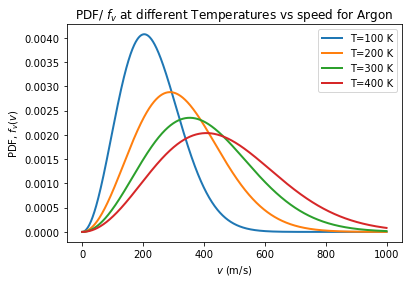

In [2]:
#probability density function (PDF, which for this case is $f_v(v)$)

def MB_speed(v,m,T):
    """ Maxwell-Boltzmann speed distribution for speeds """
    kB = 1.38e-23
    return (m/(2*np.pi*kB*T))**1.5 * 4*np.pi * v**2 * np.exp(-m*v**2/(2*kB*T))

fig = plt.figure()
ax = fig.add_subplot(111)

v = np.arange(0,1000,1)
amu = 1.66e-27
mass = 40*amu

for T in [100,200,300,400]:
    fv = MB_speed(v,mass,T)
    ax.plot(v,fv,label='T='+str(T)+' K',lw=2)

ax.legend(loc=0)
ax.set_xlabel('$v$ (m/s)')
ax.set_ylabel('PDF, $f_v(v)$')
plt.title('PDF/ $f_v$ at different Temperatures vs speed for Argon')
plt.draw()

Also visualize the curve for different Gases:

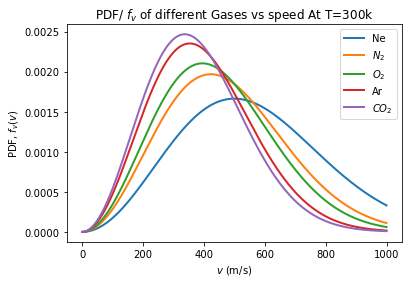

In [3]:
#probability density function (PDF, which for this case is $f_v(v)$)

def MB_speed(v,m,T):
    """ Maxwell-Boltzmann speed distribution for speeds """
    kB = 1.38e-23
    return (m/(2*np.pi*kB*T))**1.5 * 4*np.pi * v**2 * np.exp(-m*v**2/(2*kB*T))

fig = plt.figure()
ax = fig.add_subplot(111)

v = np.arange(0,1000,1)
amu = 1.66e-27
#mass = 85*amu
Temp=300
gas = ['Ne','$N_2$','$O_2$','Ar','$CO_2$']
for i,m in enumerate([20,28,32,40,44]):
    fv = MB_speed(v,m*amu,Temp)
    ax.plot(v,fv,label=gas[i],lw=2)

ax.legend(loc=0)
ax.set_xlabel('$v$ (m/s)')
ax.set_ylabel('PDF, $f_v(v)$')
plt.title("PDF/ $f_v$ of different Gases vs speed At T=300k")
plt.draw()

## The problem we want to explore:
The speed distribution of the atoms is known, but we want to know the distribution of velocities in the z-axis, since this is the only axis that will produce a Doppler shift.

### Cumulative Distribution Function (CDF)
The cumulative distribution function (CDF), $C_v(v)$ is used for generating random speeds, CDF can be derived from the probability density function (PDF, for this case is $f_v(v)$), as follows:
$$ C_v(v) = \int_{-\inf}^{v} f_v(v') \; {\rm d}v' $$

$$ C_v(v) = {\rm erf}\left(\frac{v}{\sqrt{2k_B T/m}}\right) - \sqrt{\frac{2}{\pi}} \frac{ v \; \exp(-mv^2/2k_B T) }{\sqrt{k_B T / m}} $$

where ${\rm erf}$ is the Error function.
 Let's plot the curve for Different tempratures:

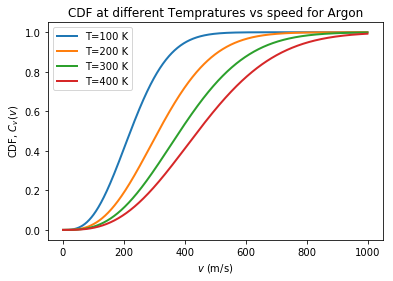

In [4]:
## cumulative distribution function (CDF)

from scipy.special import erf

def MB_CDF(v,m,T):
    """ Cumulative Distribution function of the Maxwell-Boltzmann speed distribution """
    kB = 1.38e-23
    a = np.sqrt(kB*T/m)
    return erf(v/(np.sqrt(2)*a)) - np.sqrt(2/np.pi)* v* np.exp(-v**2/(2*a**2))/a


fig = plt.figure()
ax = fig.add_subplot(111)

v = np.arange(0,1000,1)
amu = 1.66e-27
mass = 40*amu

for T in [100,200,300,400]:
    fv = MB_CDF(v,mass,T)
    ax.plot(v,fv,label='T='+str(T)+' K',lw=2)

ax.legend(loc=0)
ax.set_xlabel('$v$ (m/s)')
ax.set_ylabel('CDF, $C_v(v)$')
plt.title("CDF at different Tempratures vs speed for Argon")
plt.draw()

Visualuze the CDF Function for different gases:

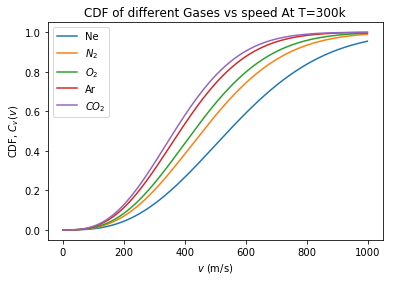

In [5]:
## cumulative distribution function (CDF)

from scipy.special import erf

def MB_CDF(v,m,T):
    """ Cumulative Distribution function of the Maxwell-Boltzmann speed distribution """
    kB = 1.38e-23
    a = np.sqrt(kB*T/m)
    return erf(v/(np.sqrt(2)*a)) - np.sqrt(2/np.pi)* v* np.exp(-v**2/(2*a**2))/a


fig = plt.figure()
ax = fig.add_subplot(111)

v = np.arange(0,1000,1)
amu = 1.66e-27
#mass = 40*amu
Temp=300
gas = ['Ne','$N_2$','$O_2$','Ar','$CO_2$']
for i,m in enumerate([20,28,32,40,44]):
    fv = MB_CDF(v,m*amu,Temp)
    ax.plot(v,fv,label=gas[i])

ax.legend(loc=0)
ax.set_xlabel('$v$ (m/s)')
ax.set_ylabel('CDF, $C_v(v)$')
plt.title("CDF of different Gases vs speed At T=300k")
plt.draw()

<p>Inverse of CDF has to be done numerically because there is no analytic inverse of CDF function. to perform this interpolation library from scipy is used</p>

In [6]:
from scipy.interpolate import interp1d as interp

amu = 1.66e-27
mass = 40*amu
T = 400

# create CDF
vs = np.arange(0,2500,0.1)
cdf = MB_CDF(vs,mass,T) # essentially y = f(x)

#create interpolation function to CDF
inv_cdf = interp(cdf,vs) # essentially what we have done is made x = g(y) from y = f(x)
                         # this can now be used as a function which is 
                         # called in the same way as normal routines


Now the speeds can be obtained using inv_cdf. In this function, the random angles for our velocity vectors are also generated, then these velocity vectors are converted into cartesian coordinates.

In [7]:
def generate_velocities(n):
    """ generate a set of velocity vectors in 3D from the MB inverse CDF function """
    rand_nums = np.random.random(n)
    speeds = inv_cdf(rand_nums)
    
    # spherical polar coords - generate random angle for velocity vector, uniformly distributed over the surface of a sphere
    # see http://mathworld.wolfram.com/SpherePointPicking.html for more info (note theta and phi are the other way around!)
    theta = np.arccos(np.random.uniform(-1,1,n))
    phi = np.random.uniform(0,2*np.pi,n)
    
    # convert to cartesian units
    vx = speeds * np.sin(theta) * np.cos(phi) 
    vy = speeds * np.sin(theta) * np.sin(phi)
    vz = speeds * np.cos(theta)
    
    return speeds, vx, vy, vz

Let's test the code and make sure that our generated speed distribution matches what we expect from $f_v(v)$:

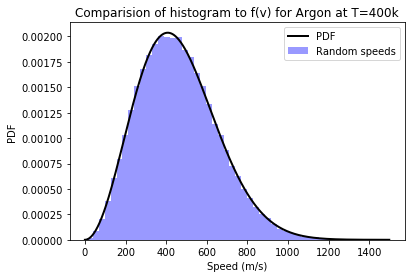

In [8]:
spd, vx, vy, vz = generate_velocities(100000)

fig = plt.figure()
ax = fig.add_subplot(111)

#generate histogram of velocities
ax.hist(spd,bins=50,density=True,fc='b',label='Random speeds',alpha=0.4,lw=0.2)

#compare this histogram to f(v) - this is MB_speed that we wrote earlier
vs = np.arange(0,1500)
kB = 1.38e-23
amu = 1.66e-27
mass = 40*amu
T = 400
fv = MB_speed(vs,mass,T)
ax.plot(vs,fv,'k',label='PDF',lw=2)

ax.set_xlabel('Speed (m/s)')
ax.set_ylabel('PDF')
plt.title('Comparision of histogram to f(v) for Argon at T=400k')
plt.legend(loc=0)

plt.show()

The results match. Now let's look at the Z-component, which is what we were interested in:

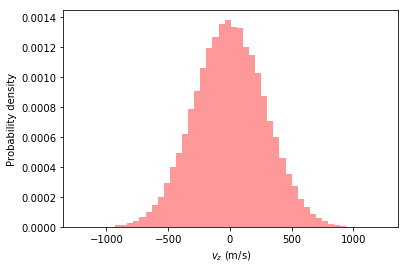

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

h,b,c = ax.hist(vz,bins=50,density=True,fc='r',alpha=0.4,lw=0.2)

# print (h.sum()*(b[1]-b[0]))

ax.set_xlabel('$v_z$ (m/s)')
ax.set_ylabel('Probability density')
plt.show()

Gaussian(normal) form, which is the analytic form:

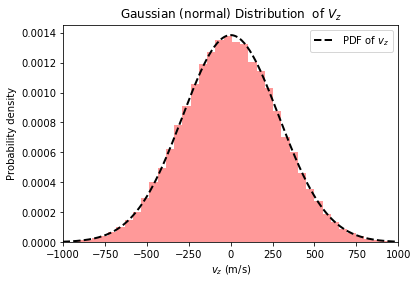

In [11]:
## the analytic form on now; it has a Gaussian (normal) form:
u = np.sqrt(2*kB*T/mass)
vzt = np.arange(-4*u,4*u,u/50)
mbz = np.exp(-vzt**2/u**2)/np.sqrt(u*np.pi)
mbz /= (mbz.sum() * (vzt[1]-vzt[0]))
ax.set_title('Gaussian (normal) Distribution  of $V_z$')

ax.plot(vzt,mbz,'k--',label='PDF of $v_z$',lw=2)
ax.legend(loc=0)
ax.set_xlim(-1000,1000)
display(fig)